In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles
from plots import plots_paint_rectangles
from plots import teste_plots_rectangles
#from plots import teste_plots_paint_rectangles

# Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si. (OK)

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 10 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
#z = np.linspace(zmin, zmax, nobs, endpoint=True)
z = np.zeros( len(x) )
for i in range( len(x) ):
    z[i] = random.uniform(0.0, -10.0)

print(x[1]-x[0])

11.11111111111111


In [6]:
# localizacao do primeiro prisma em funcao da posicao de observacao (1 prisma por observacao):
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) )

print (x_prisma)

5.555555555555555


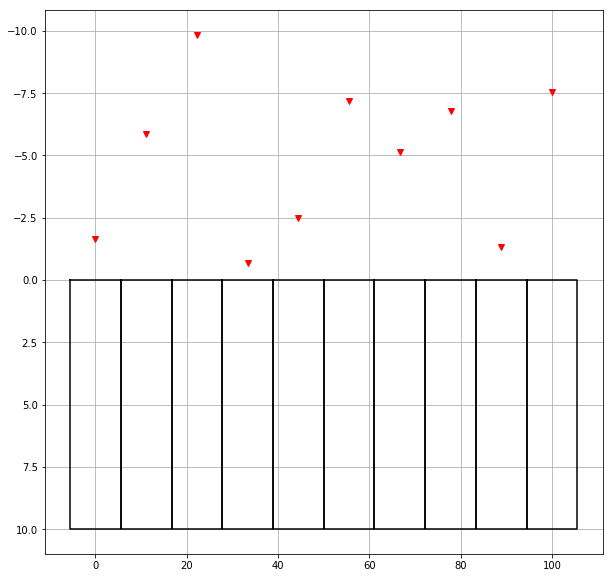

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
#plt.ylim(zmin, zmax + 10)
plt.gca().invert_yaxis()
plt.show()

# Observação: Os triângulos vermelhos consideram o relevo que virá a ser adicionado mais a frente

# Tarefa:
> Testar a funcao plots_rectangles com o objetivo de representar um ambiente qualquer por retângulos: (OK)

In [8]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
p = np.linspace(2.0, 20.0, len(x), endpoint=True )
print( p )

[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


In [9]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(0.0, 30.0) 
print( cden )

[10.14243735  2.23743668  5.27995027 12.22961724  8.53420505 23.38998708
 18.02277577  1.45776688  0.70204877 27.33328079]


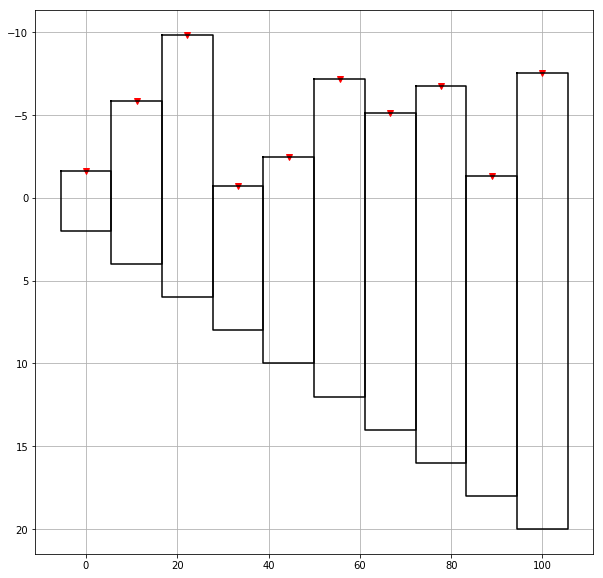

In [10]:
x_coord, z_coord = plots_rectangles(x, z, p, ref=0, color='black')

# Tarefas:
> (1) Ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK, foi ajustado acima) <br> 
> (2) Preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (OK) ($g/cm^3$)

In [ ]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow
plt.figure( figsize=(10,10) )

beta = 3.7
rho0 = 2.78

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ):
        zz = np.linspace( 0.0, p[i], len(xp), endpoint=True )
        #cden[j] = rho0 * beta**2/( beta + zz[j] )**2 
        cden[j] = random.uniform(0.0, 30.0)
    print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    # plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    ################# ESSA PARTE DESSE DEVE SER RETIRADA QUANDO A TAREFA ATUAL FOR CONCLUÍDA #####################
    if i == (nobs - 1):
        mi = min(cden)
        ma = max(cden) 
    if i == 0:   
        lista0 = np.copy(cden)
    elif i == 1:   
        lista1 = np.copy(cden)
    elif i == 2:
        lista2 = np.copy(cden)
    elif i == 3: 
        lista3 = np.copy(cden)
    elif i == 4:
        lista4 = np.copy(cden)
    elif i == 5:
        lista5 = np.copy(cden)
    elif i == 6:
        lista6 = np.copy(cden)
    elif i == 7:
        lista7 = np.copy(cden)
    elif i == 8:
        lista8 = np.copy(cden)
    elif i == 9:
        lista9 = np.copy(cden)
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
# se a colorbar for colocada dentro do for, será possível ver que é adotada uma escala de cor para cada prisma separado
# pelo comentário acima, foi visto uma necessidade de padronizar essa colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

In [ ]:
# Conferindo a colorbar para cada prisma (ATUALIZANDO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 9 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

cden = np.array(lista9) # alterar o que está dentro de np.array para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!
print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)
    
im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=mi, vmax=ma,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
# plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) 
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

In [ ]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow (ATUALIZADO)
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    for j in range( len(xp) ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    # plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    ################# ESSA PARTE DESSE DEVE SER RETIRADA QUANDO A TAREFA ATUAL FOR CONCLUÍDA #####################
    if i == (nobs - 1):
        for j in range ( len(xp) ):
            if j == 0:
                mi2 = cden[i][j]
                ma2 = cden[i][j]
            else:
                if cden[i][j] > ma2:
                    ma2 = cden[i][j]
                if cden[i][j] < mi2:
                    mi2 = cden[i][j]
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma]) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

In [ ]:
# Conferindo a colorbar para cada prisma (ATUALIZADO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 5 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'k.-')
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)

cden_part = np.array( cden[i] )
im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

# plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma])
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

In [ ]:
# Aplicando o relevo aos prismas já coloridos devidamente com o plt.imshow
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs): # criando os valores de constraste de densidade e adquirindo o valor máximo e mínimo que serão usados na escala da colorbar 
    for j in range( 5 ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs): # plotagem de retângulos
    if z[i] < 0:
        plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             ( z[i], z[i], 0 + p[i] , 0 + p[i], z[i] ), 'k.-')
    else:
        plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             ( z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ), 'k.-')
        
for i in range (nobs): # pintando as áreas dos retângulos
    if z[i] < 0:        
        zp = np.array([ z[i], z[i], 0 + p[i] , 0 + p[i], z[i] ])
        if i == 0:
            zmin2 = z[i] 
            zmax2 = 0 + p[i]
        else:
            if 0 + p[i]  > zmax2:
                zmax2 = 0 + p[i]
            if z[i]  < zmin2:
                zmin2 = z[i] 
    else:        
        zp = np.array([ z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ])
        if i == 0:
            zmin2 = z[i] 
            zmax2 = z[i] + p[i]
        else:
            if z[i] + p[i]  > zmax2:
                zmax2 = z[i] + p[i]
            if z[i]  < zmin2:
                zmin2 = z[i] 
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    # plt.gca().invert_yaxis() # esse code foi inutilizado pelo uso do plt.ylim abaixo

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim(zmax2 + 2, zmin2 - 2)

plt.grid()
plt.show()

# Tarefa:
> Testar a função plots_paint_rectangles para plotar retângulos pintados de forma que representem o ambiente com uma certa fidelidade e que sejam pintados de acordo com alguma propriedade ou grandeza física das subperfícies que esteja em estudo. Essa função será testada em dois casos que são descritos abaixo. <br>
>> (1) Considerar essa propriedade ou grandeza física constante para cada retângulo (OK) <br>
>> (2) Considerar essa propriedade ou grandeza física variando para cada retângulo (OK)

## TODO:
> (1) Generalizar o numero de pontos (elementos de var) dentro de cada prisma para plotagem (refinar as cores) (OK)<br>
> (2) A pessoa estipula a nivel de referencia que deseja utilizar para a posicao do topo de cada prismas. (OK)

In [ ]:
# Caso em que a propriedade ou grandeza física varia para cada retângulo
cden = []
n = 3
for i in range (nobs):
    for j in range( n ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )

plots_paint_rectangles(x, z, p, ref=0, n_var=n, var=cden, name='Density constrast $(g/cm^3)$', cmap='RdBu_r')

In [ ]:
# Caso em que a propriedade ou grandeza física é constante para cada retângulo
teste = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
plots_paint_rectangles(x, z, p, ref=0, n_var=1, var=teste, name='Density constrast $(g/cm^3)$', cmap='RdBu_r')

# Dúvidas:
> (1) Perguntar sobre o p. De acordo com a descrição na função, ele é a diferença entre o topo e a base do retangulo. Mas, ele foi usado como se fosse a difença entre a base do retângulo e uma linha de referência que foi o z = 0. O que seria o certo? (OK) <br>
> (2) Perguntar sobre o reconhecimento da variável de uma função dentro da outra (OK)

In [ ]:
### USO DO ENUMERATE PARA EVENTUAIS LOOPS MULTIPLOS
A = np. ones( (2,5) )
A[0,:] = 5.0

In [ ]:
for i,j in enumerate(A):
    print(i)

# Teste de sugestão de funções:
> (1) teste_plots_rectangles. Essa função delimita o limite sedimento - embasamento e delimita o próprio relevo na superfície; <br>
> (2) teste_plots_paint_rectangles. Essa função delimita o limite sedimento - embasamento e delimita o próprio relevo na superfície. Além disso, ela colori as demais regiões além do prisma, cada uma de uma forma diferente.

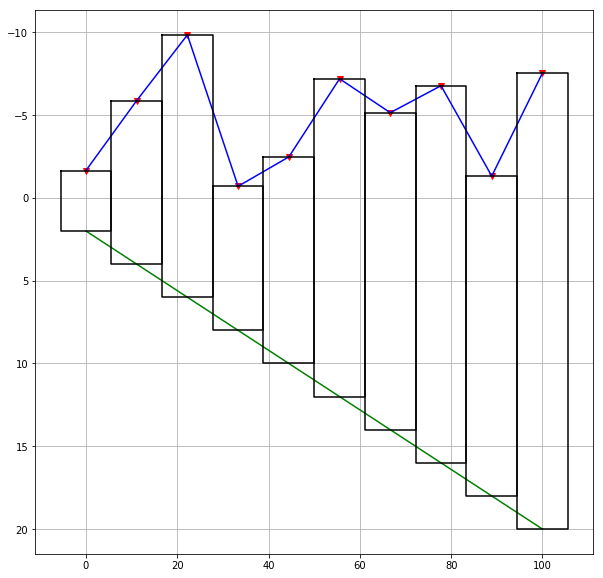

In [11]:
# Testando a função teste_plots_rectangles:
teste_plots_rectangles(x, z, p, ref=None, color1='blue', color2='black', color3='green')